# Clean_IMBD Notebook

This notebook is visualizing the raw data with other statistics regarding the missing values.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



## Read the data file

In [2]:
IMBD_data = pd.read_csv("../data/raw/imdb_top_1000_lang_en.csv")
IMBD_data

,title,title_href,mc_link,genre,certificate,votes,metascore,directors,stars,introduction,produce_year,runtime,rating
0,Spider-Man: No Way Home,/title/tt10872600/,https://www.metacritic.com/movie/spider-man-no...,"Action,Adventure,Fantasy",PG-13,475200,71.0,PG-13,148 min,"\nWith Spider-Man's identity now revealed, Pet...",2021,148,8.7
1,Licorice Pizza,/title/tt11271038/,https://www.metacritic.com/movie/licorice-pizz...,"Comedy,Drama,Romance",R,39990,90.0,R,133 min,\nThe story of Alana Kane and Gary Valentine g...,2021,133,7.6
2,Dune,/title/tt1160419/,https://www.metacritic.com/movie/dune-part-one...,"Action,Adventure,Drama",PG-13,495468,74.0,PG-13,155 min,\nFeature adaptation of Frank Herbert's scienc...,2021,155,8.1
3,CODA,/title/tt10366460/,https://www.metacritic.com/movie/coda-2021?fta...,"Comedy,Drama,Music",PG-13,53577,74.0,PG-13,111 min,\nAs a CODA (Child of Deaf Adults) Ruby is the...,2021,111,8.1
4,Kingsman: The Secret Service,/title/tt2802144/,https://www.metacritic.com/movie/kingsman-the-...,"Action,Adventure,Comedy",R,640772,NaN,R,129 min,\nA spy organisation recruits a promising stre...,2014,129,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,The Muppet Christmas Carol,/title/tt0104940/,https://www.metacritic.com/movie/the-muppet-ch...,"Comedy,Drama,Family",G,57185,64.0,G,85 min,\nThe Muppet characters tell their version of ...,1992,85,7.7
787,Knockin' on Heaven's Door,/title/tt0119472/,NaN,"Action,Crime,Comedy",Not Rated,29667,NaN,Not Rated,87 min,\nTwo terminally ill patients escape from a ho...,1997,87,7.9
788,Zelig,/title/tt0086637/,NaN,Comedy,PG,41643,NaN,PG,79 min,"\n""Documentary"" about a man who can look and a...",1983,79,7.7
789,The Edge of Heaven,/title/tt0880502/,https://www.metacritic.com/movie/the-edge-of-h...,Drama,Not Rated,31833,85.0,Not Rated,122 min,\nA Turkish man travels to Istanbul to find th...,2007,122,7.8


## Information regarding the dataframe

In [3]:
# shape and data types of the data
print(f"The shape of the dataframe = {IMBD_data.shape}")
print("")
print(f"The data types are: \n{IMBD_data.dtypes}")
print("")

# select numeric columns
df_numeric = IMBD_data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(f"The numeric columns in the dataframe are: \n{numeric_cols}")
print("")

# select non numeric columns
df_non_numeric = IMBD_data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(f"The non-numeric columns in the dataframe are: \n{non_numeric_cols}")

The shape of the dataframe = (791, 13)

The data types are: 
title            object
title_href       object
mc_link          object
genre            object
certificate      object
votes             int64
metascore       float64
directors        object
stars            object
introduction     object
produce_year     object
runtime           int64
rating          float64
dtype: object

The numeric columns in the dataframe are: 
['votes' 'metascore' 'runtime' 'rating']

The non-numeric columns in the dataframe are: 
['title' 'title_href' 'mc_link' 'genre' 'certificate' 'directors' 'stars'
 'introduction' 'produce_year']


## Visualize the missing values

<AxesSubplot:>

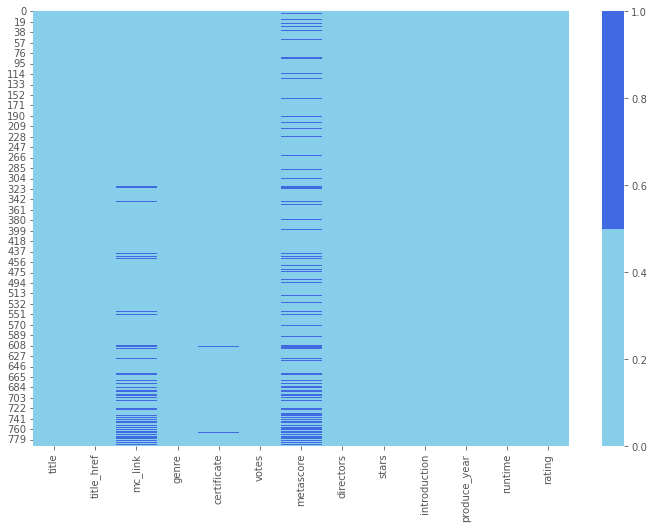

In [4]:
cols = IMBD_data.columns # imbd columns
colors = ['skyblue','royalblue'] # specify the colours - royalblue is missing. skyblue is not missing.
sns.heatmap(IMBD_data[cols].isnull(), cmap=sns.color_palette(colors))

In [5]:
# % of missing values in the columns.
for col in IMBD_data.columns:
    pct_missing = np.mean(IMBD_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

title - 0%
title_href - 0%
mc_link - 9%
genre - 0%
certificate - 0%
votes - 0%
metascore - 16%
directors - 0%
stars - 0%
introduction - 0%
produce_year - 0%
runtime - 0%
rating - 0%


In [6]:
IMBD_data.describe()

,votes,metascore,runtime,rating
count,7.910000e+02,663.000000,791.000000,791.000000
mean,3.406817e+05,80.410256,122.744627,7.948293
std,3.788820e+05,9.876917,27.888621,0.277820
min,2.521000e+04,61.000000,45.000000,7.600000
25%,7.081200e+04,73.000000,102.500000,7.700000
50%,1.931220e+05,80.000000,119.000000,7.900000
75%,4.903005e+05,88.000000,136.000000,8.100000
max,2.550370e+06,100.000000,242.000000,9.300000


In [7]:
# Dropping rows with missing columns
Clean_IMBD_data = IMBD_data.dropna(axis=0)
Clean_IMBD_data

,title,title_href,mc_link,genre,certificate,votes,metascore,directors,stars,introduction,produce_year,runtime,rating
0,Spider-Man: No Way Home,/title/tt10872600/,https://www.metacritic.com/movie/spider-man-no...,"Action,Adventure,Fantasy",PG-13,475200,71.0,PG-13,148 min,"\nWith Spider-Man's identity now revealed, Pet...",2021,148,8.7
1,Licorice Pizza,/title/tt11271038/,https://www.metacritic.com/movie/licorice-pizz...,"Comedy,Drama,Romance",R,39990,90.0,R,133 min,\nThe story of Alana Kane and Gary Valentine g...,2021,133,7.6
2,Dune,/title/tt1160419/,https://www.metacritic.com/movie/dune-part-one...,"Action,Adventure,Drama",PG-13,495468,74.0,PG-13,155 min,\nFeature adaptation of Frank Herbert's scienc...,2021,155,8.1
3,CODA,/title/tt10366460/,https://www.metacritic.com/movie/coda-2021?fta...,"Comedy,Drama,Music",PG-13,53577,74.0,PG-13,111 min,\nAs a CODA (Child of Deaf Adults) Ruby is the...,2021,111,8.1
5,West Side Story,/title/tt3581652/,https://www.metacritic.com/movie/west-side-sto...,"Crime,Drama,Musical",PG-13,31979,85.0,PG-13,156 min,"\nAn adaptation of the 1957 musical, West Side...",2021,156,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,C.R.A.Z.Y.,/title/tt0401085/,https://www.metacritic.com/movie/crazy?ftag=MC...,"Comedy,Drama",Not Rated,32590,81.0,Not Rated,129 min,"\nA young French Canadian, one of five boys in...",2005,129,7.9
785,Vera Drake,/title/tt0383694/,https://www.metacritic.com/movie/vera-drake?ft...,"Crime,Drama",R,25210,83.0,R,125 min,\nAbortionist Vera Drake finds her beliefs and...,2004,125,7.6
786,The Muppet Christmas Carol,/title/tt0104940/,https://www.metacritic.com/movie/the-muppet-ch...,"Comedy,Drama,Family",G,57185,64.0,G,85 min,\nThe Muppet characters tell their version of ...,1992,85,7.7
789,The Edge of Heaven,/title/tt0880502/,https://www.metacritic.com/movie/the-edge-of-h...,Drama,Not Rated,31833,85.0,Not Rated,122 min,\nA Turkish man travels to Istanbul to find th...,2007,122,7.8


## Check Missing Values & Create Clean CSV file

In [8]:
# % of missing values in the columns.
for col in Clean_IMBD_data.columns:
    pct_missing = np.mean(Clean_IMBD_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

title - 0%
title_href - 0%
mc_link - 0%
genre - 0%
certificate - 0%
votes - 0%
metascore - 0%
directors - 0%
stars - 0%
introduction - 0%
produce_year - 0%
runtime - 0%
rating - 0%


In [9]:
clean_data = Clean_IMBD_data.to_csv("IMBD_top_1000_clean.csv", index = False)